<a href="https://colab.research.google.com/github/mo-wasfi/learning/blob/main/is_it_a_bird%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fastai


In [4]:
import fastai
print(fastai.__file__)


/usr/local/lib/python3.10/dist-packages/fastai/__init__.py


In [5]:
!pip install fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.7 MB/s eta 0:00:00


In [6]:
from fastbook import *

In [7]:
urls=search_images_ddg('birds images',max_images=1)

In [9]:
len(urls),urls[0]

(1, 'https://jooinn.com/images/tropical-bird-2.jpg')

In [10]:
dest=Path('bird.jpg')

In [12]:
if not dest.exists():
    download_url(urls[0],dest,show_progress=False)

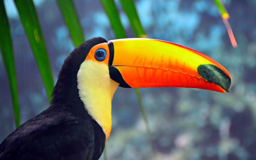

In [13]:
im=Image.open(dest)
im.to_thumb(256,256)

In [14]:
searches='forest','birds'

In [23]:
from pathlib import Path


path = Path('bird_or_not')


if not path.exists():
    path.mkdir()

searches = ['birds', 'forest']


for o in searches:
    dest = path / o
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} photo')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)


In [24]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)


(#6) [None,None,None,None,None,None]

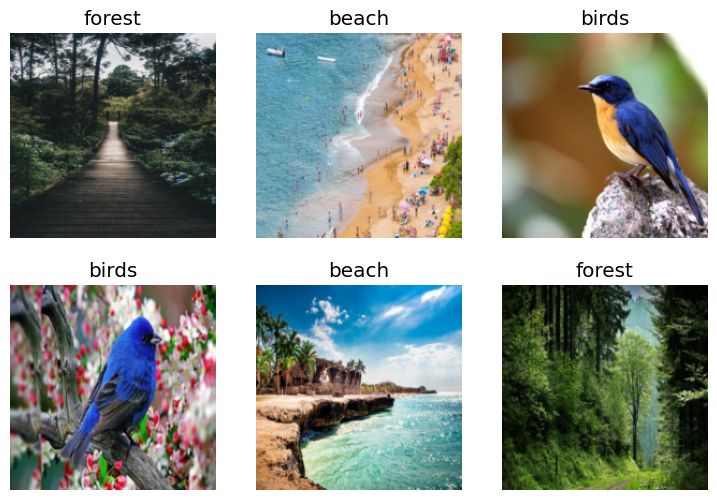

In [25]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)
dls.show_batch(max_n=6)

In [26]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd

epoch,train_loss,valid_loss,error_rate,time
0,1.085863,0.184758,0.078603,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.210394,0.065906,0.017467,00:05
1,0.137183,0.070050,0.026201,00:05
2,0.092137,0.068604,0.017467,00:04


In [34]:
is_bird, _, probs = learn.predict(PILImage.create('/content/bird_or_not/birds/f2cdf17e-aaa0-4063-b49d-c97d2a517635.jpg'))

print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[1]:.4f}")


This is a: birds.
Probability it's a bird: 1.0000
